In [64]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sympy import *
from functools import reduce
from IPython.display import Math

from math import comb

def bernulli(n,i,p):
    return comb(n,i)*p**i*(1-p)**(n-i)

# 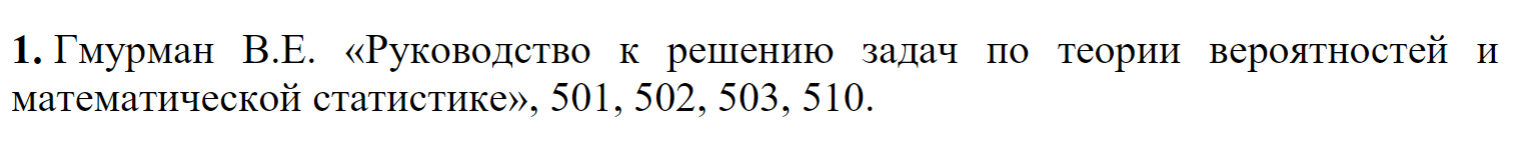

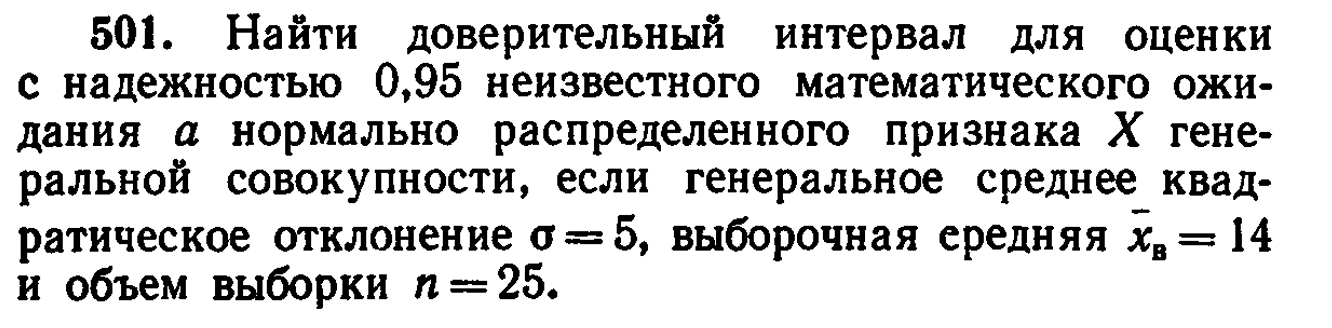

In [65]:
mu = 14
g=0.95
n=25
sigma=5

st.norm.interval(g,mu,sigma/np.sqrt(n))

(12.040036015459947, 15.959963984540053)

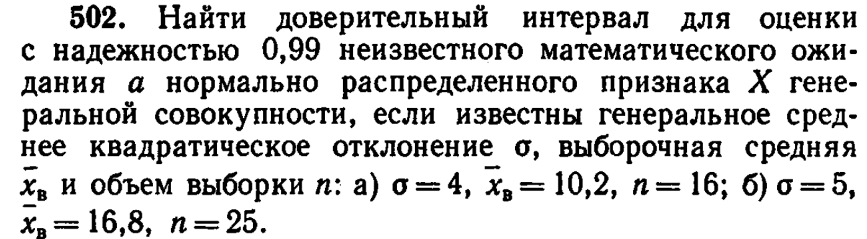

In [66]:
g=0.99

In [67]:
#a
mu = 10.2
n=16
sigma=4

st.norm.interval(g,mu,sigma/np.sqrt(n))

(7.624170696451099, 12.7758293035489)

In [68]:
#b
mu = 16.8
n=25
sigma=5

st.norm.interval(g,mu,sigma/np.sqrt(n))

(14.2241706964511, 19.3758293035489)

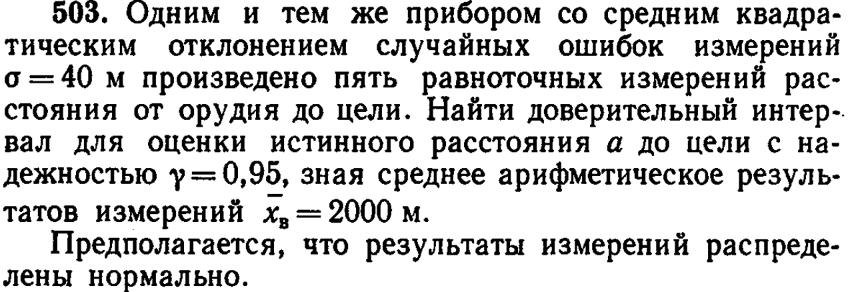

In [69]:
mu = 2000
g=0.95
n=5
sigma=40

st.norm.interval(g,mu,sigma/np.sqrt(n))

(1964.9390983769367, 2035.0609016230633)

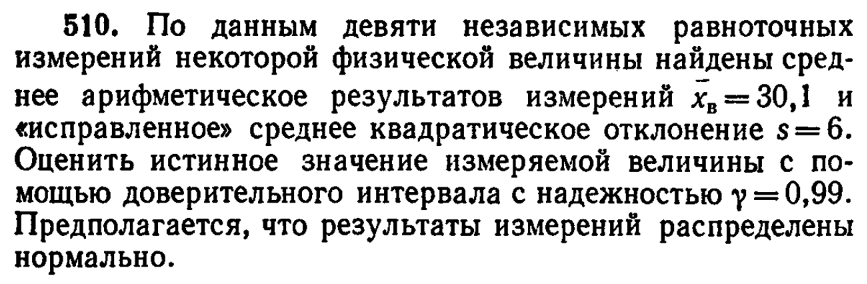

In [70]:
n=9
mu=30.1
s=6
g=0.99
st.t.interval(g,n-1,mu,s/np.sqrt(n))

(23.389225337333208, 36.810774662666795)

# 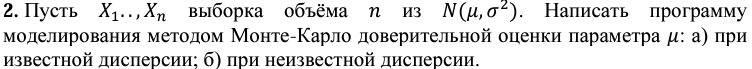

## a

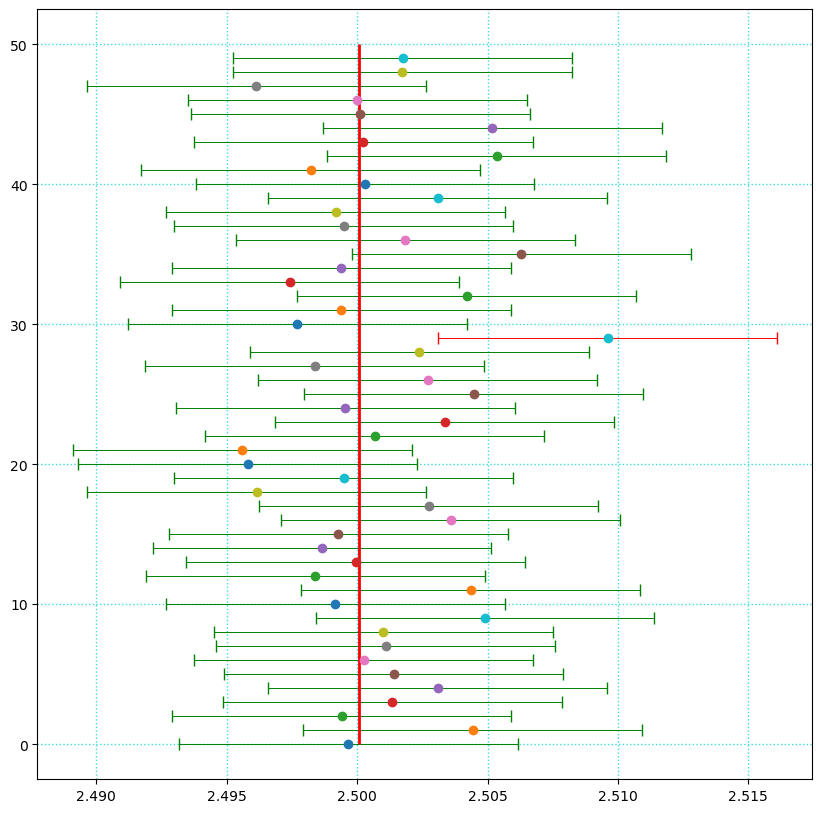

In [71]:
def d_t(s,n,g):
    t_g = st.t.ppf((1+g)/2,(n-1))
    d = t_g*s/np.sqrt(n)
    return d

def d_norm(s,n,g):
    t_g = st.norm.ppf((1+g)/2)
    d = t_g*s/np.sqrt(n)
    return d

def get_d(X,g,s=-1):
    mu = X.mean()
    if s>=0:
        return  d_norm(s,X.size,g)
    else:
        return  d_t(s,X.size,g)

fig,ax=plt.subplots(figsize=(10,10))

quan=50
g=0.96
N=10**5
n=10**3
s=0.1
mu=2.5
X = st.norm.rvs(mu,s,size=N)

for i in range(quan):
    x=np.random.choice(X,n)
    d_x = get_d(x,g,s)
    mu_x=x.mean()
    if mu_x+d_x>np.mean(X)>mu_x-d_x:
        plt.errorbar(mu_x,i,None,d_x,'-o','g',0.7,4)
    else:
        plt.errorbar(mu_x,i,None,d_x,'-o','r',0.7,4)
        
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
plt.vlines(ymin=0, ymax=quan, x=np.mean(X), linewidth=2.0,color="red")
plt.show()

## b

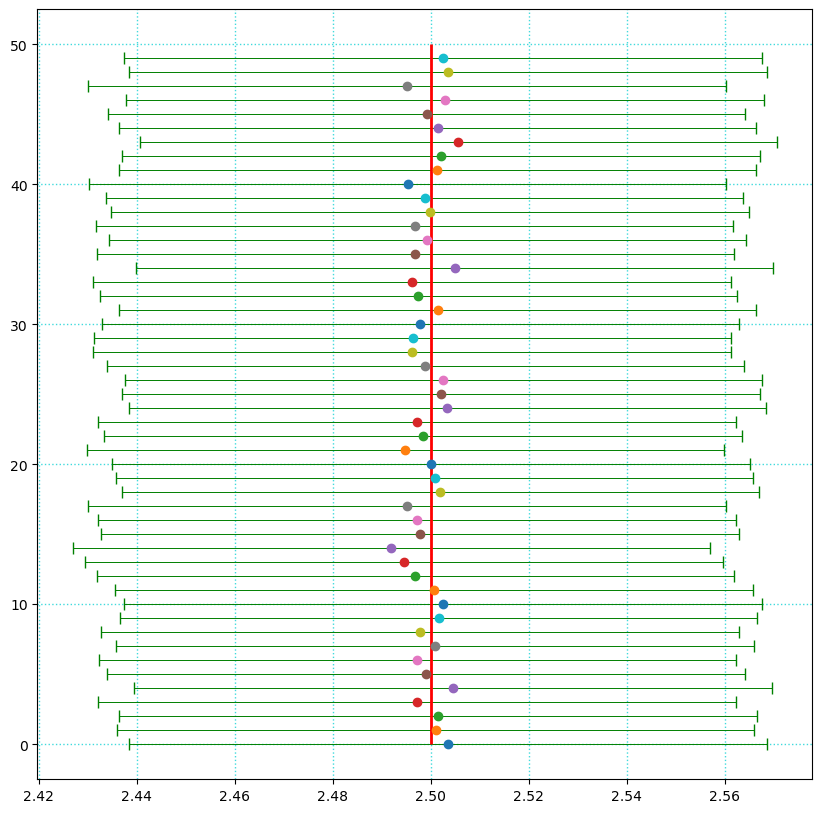

In [76]:
fig,ax=plt.subplots(figsize=(10,10))
for i in range(quan):
    x=np.random.choice(X,n)
    d_x = abs(get_d(x,g))
    mu_x=x.mean()
    if mu_x+d_x>np.mean(X)>mu_x-d_x:
        plt.errorbar(mu_x,i,None,d_x,'-o','g',0.7,4)
    else:
        plt.errorbar(mu_x,i,None,d_x,'-o','r',0.7,4)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
plt.vlines(ymin=0, ymax=quan, x=np.mean(X), linewidth=2.0,color="red")
plt.show()